In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matrixprofile.discover import snippets
import pandas as pd
from sklearn import preprocessing


In [2]:
p = Path('../Dataset/WalkRun1_80_3800_200.txt')
a = np.loadtxt(p)

In [3]:
a

array([ 0.014993 , -0.043289 , -0.0039098, ...,  1.7561   ,  1.4959   ,
        1.3823   ])

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(a.reshape(-1,1)).T[0]

In [5]:
x_scaled

array([0.48981087, 0.48807958, 0.48924935, ..., 0.54153101, 0.53380169,
       0.53042716])

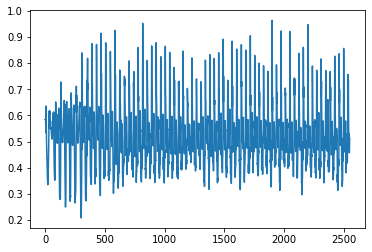

In [79]:
plt.plot(x_scaled[:])

In [6]:
n = 2
snp = snippets(x_scaled, num_snippets=n, snippet_size =300)
nerb = []
for item in snp:
    nerb.append(item["fraction"])
fract = np.array(nerb).min()
print(fract)
while True:
    n+=1
    print(n)
    snp_ = snippets(x_scaled, num_snippets=n, snippet_size =300)
    nerb = []
    for item in snp_:
        nerb.append(item["fraction"])
    fract = np.array(nerb).min()
    print(fract)
    if(fract>0.10):
        snp = snp_
    else:
        break

0.4328985507246377
3
2
[0.3118840579710145, 0.4308695652173913, 0.257536231884058]
0.257536231884058
4
3
[0.27695652173913043, 0.4072463768115942, 0.25420289855072464, 0.06188405797101449]
0.06188405797101449


In [7]:
snip_arr={}
for i, item in enumerate(snp):
    for neighbor in item['neighbors']:
        if neighbor+301<7002:
            snip_arr[neighbor] = [item['snippet'],a[neighbor:neighbor+300].tolist(),a[neighbor+301],i]

In [8]:
snip_arr = dict(sorted(snip_arr.items(), key=lambda x: x[0]))

In [9]:
arr =[]
for k,v in snip_arr.items():
    v.append(k)
    arr.append(v)

In [12]:
import json
df = pd.DataFrame(np.array(arr),columns=["snippet",'data','true',"idx","class"])
df.snippet= df.snippet.apply(lambda x: json.dumps(x.tolist()))
df.to_csv("lstm.csv")

In [13]:
df = pd.DataFrame(arr_snp, columns = arr_snp[0].keys())

In [14]:
p = Path('../Dataset/WalkRun1_80_3800_200.csv')
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))
df.to_csv(p)